<a href="https://colab.research.google.com/github/therealGARRETTKEYT/CS4410/blob/main/Homework6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


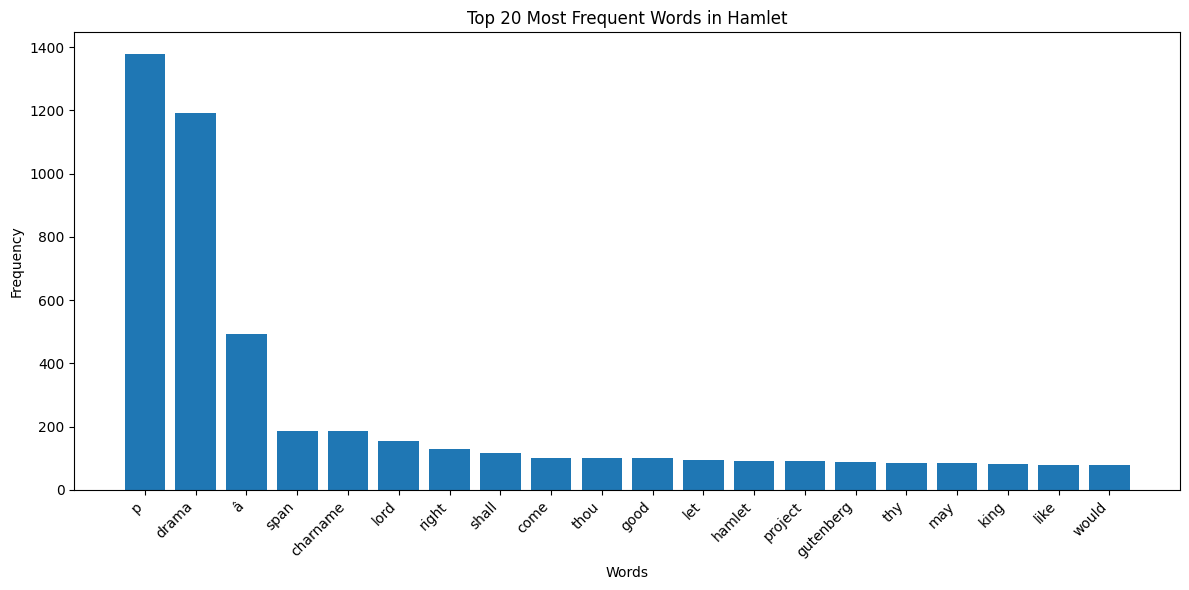

<ipython-input-8-d3f0ec600c1a>:49: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  mask_image = imageio.imread(image_file)


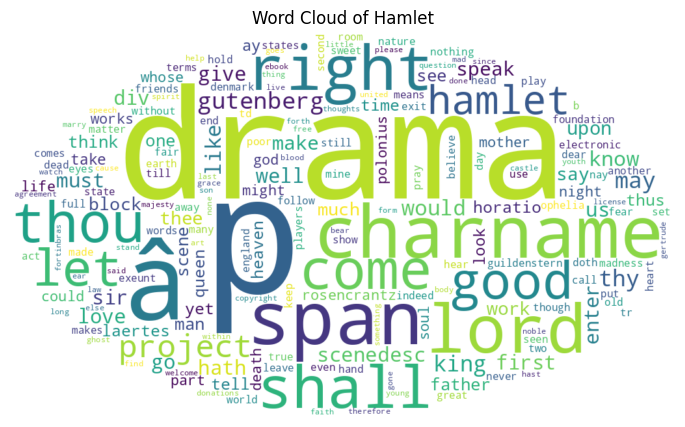

In [8]:
!pip install imageio
import requests
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from textblob import TextBlob
import imageio

# Download required NLTK resources if you haven't already
nltk.download('punkt')
nltk.download('stopwords')

# Fetch Hamlet text from Project Gutenberg
target_url = 'http://www.gutenberg.org/files/1524/1524-h/1524-h.htm'
response = requests.get(target_url)
data = response.text

blob = TextBlob(data)

# Tokenize the text
tokens = word_tokenize(data)

# Remove stop words
stop_words = set(stopwords.words('english'))
tokens = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]

# Calculate word frequencies
word_freq = nltk.FreqDist(tokens)

# Get top 20 words
top_20 = word_freq.most_common(20)

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(*zip(*top_20))
plt.xticks(rotation=45, ha='right')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Frequent Words in Hamlet')
plt.tight_layout()
plt.show()

# Load the mask image from the URL
image_file = "https://media.cheggcdn.com/media/216/21621ee5-e80f-47f3-9145-513f2229b390/phploeBuh.png"
mask_image = imageio.imread(image_file)

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', mask=mask_image, stopwords=STOPWORDS).generate_from_frequencies(word_freq)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Hamlet')
plt.show()